In [83]:
import math

def pdf(t, c):
    lhs = 1.0 / ((math.e - 1.0)*c)
    rhs = math.exp(t / c)
    return lhs * rhs

In [84]:
pdf(1, 1)

1.5819767068693265

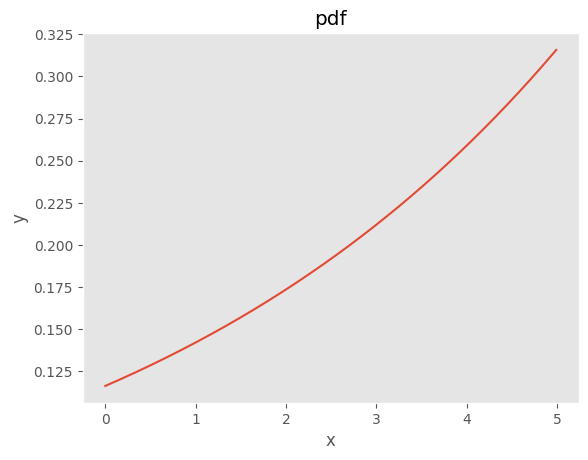

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 5.0, 0.01)
s = np.array(list(map(lambda x: pdf(x, 5.0), t)))

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='x', ylabel='y',
       title='pdf')
ax.grid()

fig.savefig("test.png")
plt.show()

In [86]:
def sample_karlin(pdf, interval, pdfmax = 1, integers = True, max_iterations = 10000):
    for i in range(max_iterations):
        if integers == True:
            rand_x = np.random.randint(interval[0], interval[1])
        else:
            rand_x = (interval[1] - interval[0]) * np.random.random(1) + interval[0] #(b - a) * random_sample() + a

        rand_y = pdfmax * np.random.random(1) 
        calc_y = pdf(rand_x)

        if(rand_y <= calc_y ):
            return rand_x

    raise Exception("Could not find a matching random number within pdf in " + max_iterations + " iterations.")

In [89]:
sample_karlin(lambda x: pdf(x, 10.0), [0, 10],pdfmax=0.158)

5

In [91]:
items = np.zeros(10000)
random_samples = np.array(list(map(lambda x: sample_karlin(lambda x: pdf(x, 10.0), [0, 10],pdfmax=0.158, integers=True), items)))

[Text(0.5, 1.0, 'Sample distribution histogram')]

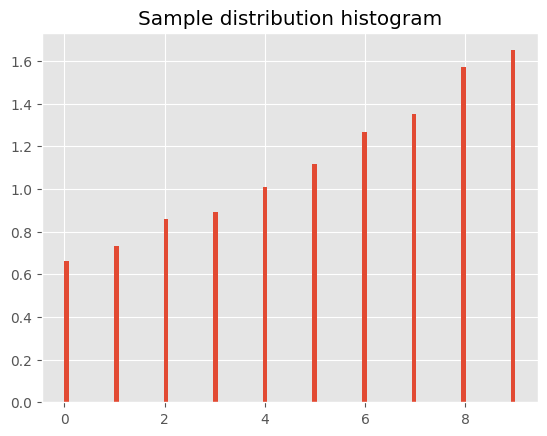

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax0 = plt.subplots(ncols=1, nrows=1)
t = np.arange(0.0, 10.0, 0.01)
(values, bins, _) = ax0.hist(random_samples,bins=100,density=True,label="Histogram of samples") 
ax0.set(title='Sample distribution histogram')